# **ML: Regression Models**

Checkpoint Objective
Regression
This is a dataset containing over 21613 houses and their characteristics. The goal is to find the best model to predict a house’s price.



1. Explore this dataset using what you have learned in data preprocessing and data visualization

2. Write a paragraph selecting the most important features (feature selection).

3. Split your dataset into a training set and a testing set.

4. Apply linear regression to your training set.

5. Plot the linear regression.

5. Measure the performance of linear regression using the testing set.

6. Apply multiple-linear regression and compare it to the linear model.

7. Apply polynomial regression and compare it to linear and multilinear regression.

Note: Every result has to be interpreted and justified. Write your interpretations in a markdown.

**By:** LOUBAR Ahcene

# **Pre-step : Imports**

In [22]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# **I - EDA : Data exploration, visualisation and pre-processing**

In [23]:
Data = pd.read_csv("/content/kc_house_data.csv")
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

A first thing we can notice about our dataset is that it has a lot of features, which can lead us to think about narrowing them to onlybthe once that are relevant to predict house prices, using feature selection

Secondly we can see that the "date" feature is an an object type (abstract type) and it doesn't make sense to use it that way

In [24]:
Data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We can see that there are no NaN values on our dataset, which can lead us to think at first glace that our data doesn't have missing values, but further exploration is needed to determine that.
Sometimes missing values, in datasets, are replaced by the mean value of the feature when there are few missing values, but sme other times they're replaced with zeros instead which cna be a problem when there are a lot of missing values.

In [25]:
(Data==0).sum()

id                   0
date                 0
price                0
bedrooms            13
bathrooms           10
sqft_living          0
sqft_lot             0
floors               0
waterfront       21450
view             19489
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated     20699
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [26]:
(Data["yr_renovated"].value_counts()/Data.shape[0])*100

0       95.771064
2014     0.421043
2013     0.171193
2003     0.166566
2005     0.161940
          ...    
1951     0.004627
1959     0.004627
1948     0.004627
1954     0.004627
1944     0.004627
Name: yr_renovated, Length: 70, dtype: float64

We can see here that some features have a lot of missing values:



*   bedrooms: 13 houses with 0 bedrooms, so this one makes sense.
*   bathrooms: 10 houses with 0 bathrooms, this one also makes sense.
*   waterfront: this one get boolean values, to represent yes or no for houses having a waterfront, and there are 21450 houses that don't have a waterfront and it makes sense.
*   view: this variable takes a value between 0 and 4, 0 indicates that the house has No view, so it makes sense to have 19489 with No view.
*   sqft_basement: 13126 have no basement, makes sense.
*   yr_renovated: is it possible that 20699 houses were renovated on the year 0? of course not! so we can say that all those 0s replaced the missing values (NaN) and 20699 is an important number so this feature can't ans won't help us in our task of predicting house prices.

We will remove it from the dataset.

In [31]:
Data.drop(columns = "yr_renovated", inplace=True)

In [27]:
Data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
#Data["date"] = pd.to_datetime(Data["date"])

In [28]:
Data["year"] = Data["date"].str.split("T").str[0].str[:4]
Data["month"] = Data["date"].str.split("T").str[0].str[4:6]
Data["day"] = Data["date"].str.split("T").str[0].str[6:]

We don't need the "date" feature anymore and the "id" feature is irrelevant for predicting the house price.

In [29]:
Data.drop(["date", "id"], axis = 1, inplace = True)

In [30]:
Data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,09
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,02,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,09
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,02,18


Let's try and create a the age of the houses feature because we can and because it may help us with the predictions.

In [32]:
Data["house_age"] = [int(Data['year'][index]) - Data['yr_built'][index] for index in range(Data.shape[0])]
Data["house_age"].agg({"min", "max", "mean"})

max     115.000000
min      -1.000000
mean     43.317818
Name: house_age, dtype: float64

We see that the minimum house age is -1 which doesn't make any sense. now a few explanations are possible and one of them may just be an error while registering the information.

Let's see how many houses have an age of -1 and remouve them if there aren't many of them:

In [33]:
Data[Data["house_age"] < 0].shape

(12, 22)

In [34]:
Data.drop(Data[Data["house_age"] < 0].index , inplace =True)
Data.reset_index(inplace = True , drop =True)

In [35]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21601 entries, 0 to 21600
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21601 non-null  float64
 1   bedrooms       21601 non-null  int64  
 2   bathrooms      21601 non-null  float64
 3   sqft_living    21601 non-null  int64  
 4   sqft_lot       21601 non-null  int64  
 5   floors         21601 non-null  float64
 6   waterfront     21601 non-null  int64  
 7   view           21601 non-null  int64  
 8   condition      21601 non-null  int64  
 9   grade          21601 non-null  int64  
 10  sqft_above     21601 non-null  int64  
 11  sqft_basement  21601 non-null  int64  
 12  yr_built       21601 non-null  int64  
 13  zipcode        21601 non-null  int64  
 14  lat            21601 non-null  float64
 15  long           21601 non-null  float64
 16  sqft_living15  21601 non-null  int64  
 17  sqft_lot15     21601 non-null  int64  
 18  year  

In [36]:
Data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,2.160100e+04,21601.000000,21601.000000,21601.000000,2.160100e+04,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000,21601.000000
mean,5.401295e+05,3.370909,2.114590,2079.835332,1.511319e+04,1.493866,0.007546,0.234341,3.409657,7.656405,1788.339799,291.495533,1970.980695,98077.916208,47.560008,-122.213844,1986.674645,12772.457664,43.342438
std,3.672153e+05,0.929812,0.770069,918.264931,4.143112e+04,0.539673,0.086541,0.766418,0.650852,1.175361,828.039834,442.599587,29.363254,53.502977,0.138582,0.140843,685.490759,27311.041452,29.365068
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.215000e+05,3.000000,1.750000,1430.000000,5.042000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.470800,-122.328000,1490.000000,5100.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571700,-122.230000,1840.000000,7620.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10086.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000


# Let's visualise the distributions of some of our features



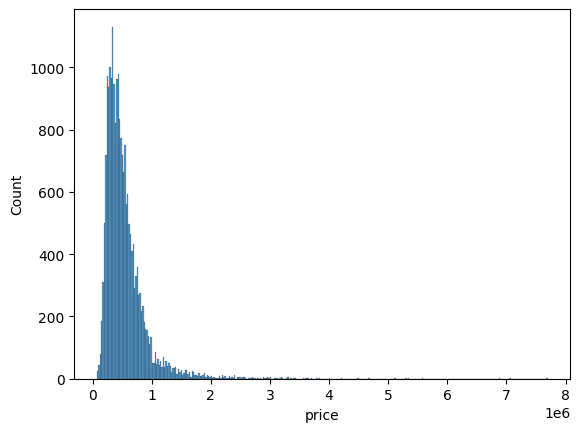

In [37]:
sns.histplot(Data["price"])
plt.show()

In [38]:
Data["bedrooms"].value_counts()

3     9821
4     6880
2     2757
5     1598
6      272
1      198
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [39]:
Data["bathrooms"].value_counts()

2.50    5379
1.00    3851
1.75    3047
2.25    2046
2.00    1929
1.50    1444
2.75    1184
3.00     752
3.50     730
3.25     588
3.75     155
4.00     135
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

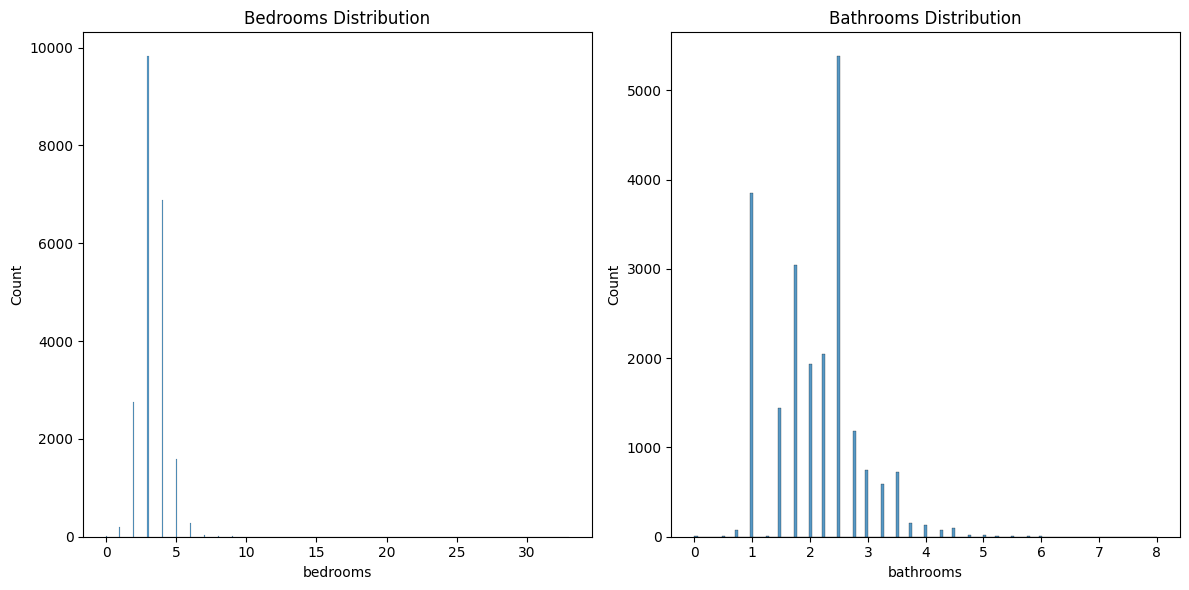

In [40]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the histogram for 'bedrooms' on the first subplot
sns.histplot(Data["bedrooms"], ax=axes[0])
axes[0].set_title('Bedrooms Distribution')

# Plot the histogram for 'bathrooms' on the second subplot
sns.histplot(Data["bathrooms"], ax=axes[1])
axes[1].set_title('Bathrooms Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Let's use boxplots to look to see if there are many outliers in the bedrooms and bathrooms features.

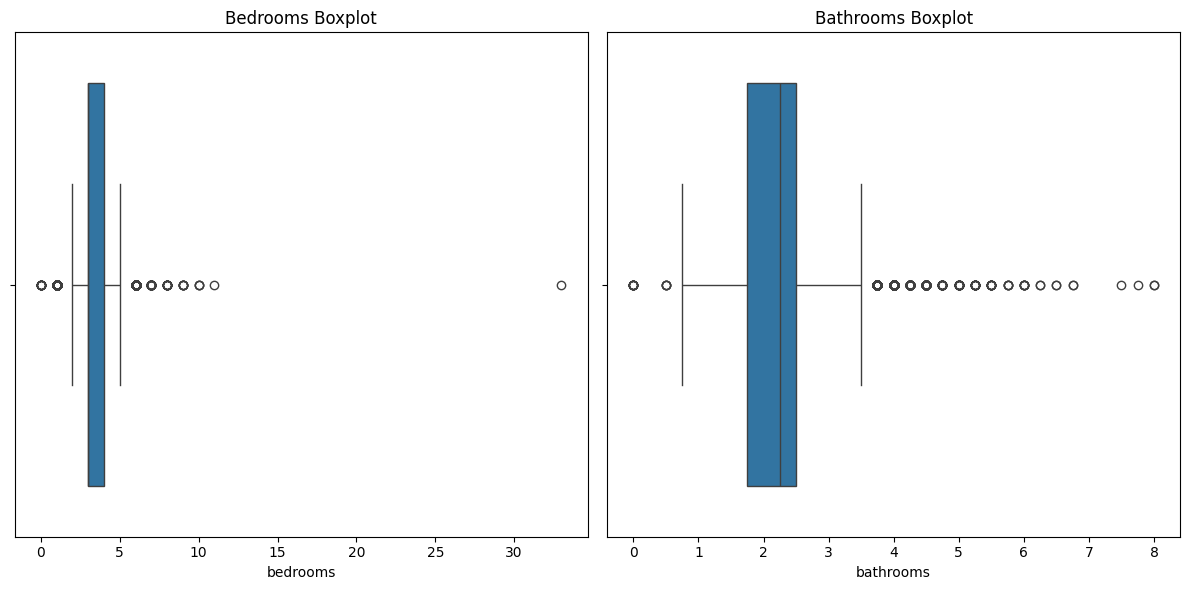

In [41]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot for 'bedrooms' on the first subplot
sns.boxplot(x=Data["bedrooms"], ax=axes[0])
axes[0].set_title('Bedrooms Boxplot')

# Boxplot for 'bathrooms' on the second subplot
sns.boxplot(x=Data["bathrooms"], ax=axes[1])
axes[1].set_title('Bathrooms Boxplot')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [42]:
Data["waterfront"].value_counts()/Data.shape[0]

0    0.992454
1    0.007546
Name: waterfront, dtype: float64

this makes sense as not a lot of houses can have a waterfront

We will use the heatmap of the correlation matrix to see the correlations between our features. This can help us to select relevant features to predict house prices.

<Axes: >

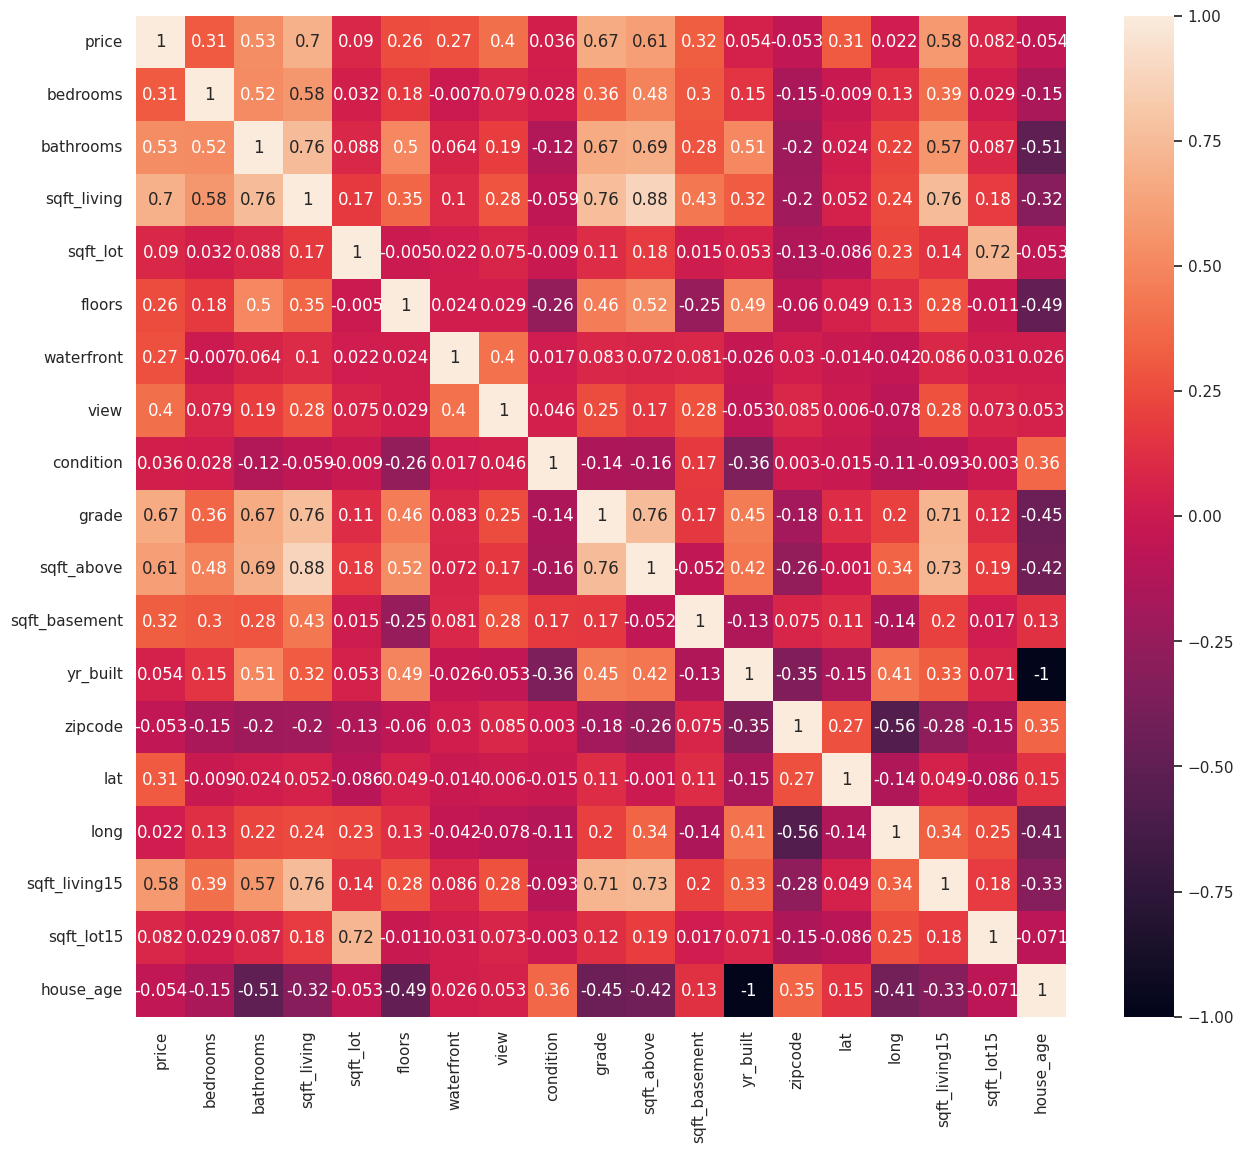

In [54]:
sns.set(rc={'figure.figsize':(15,13)})
sns.heatmap(Data.corr().round(decimals=3), annot=True)

# **II - Feature selection**

Using the heatmap, as well as the other plots we visualized previously, we can start selecting a few features:


1.   We are going to do multiple types of regression, one that requires only 1 feature(simple linear regression for eac feature), and two other models that require more than 1(multi-linear and polynomial regression).
2.   To keep it simple as well as effective, we will select features with a correlation equal to or above 0.3, or equal to and below -0.3.







In [ ]:
# the best features are: bedrooms, bathrooms, sqft_living, grade, sqft_above, lat
X = Data[["bedrooms", "bathrooms", "sqft_living", "grade", "sqft_above", "lat", "sqft_living15"]]
# Target or labels
Y = Data["price"]
(X.shape, Y.shape)

In [ ]:
# splitting into train and test data for simple linear models
X_train_0, X_test_0, Y_train_0, Y_test_0 = train_test_split(X.iloc[:,0].to_numpy(), Y, test_size=0.2, random_state=42)
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X.iloc[:,1].to_numpy(), Y, test_size=0.2, random_state=42)
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X.iloc[:,2].to_numpy(), Y, test_size=0.2, random_state=42)
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X.iloc[:,3].to_numpy(), Y, test_size=0.2, random_state=42)
X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(X.iloc[:,4].to_numpy(), Y, test_size=0.2, random_state=42)
X_train_5, X_test_5, Y_train_5, Y_test_5 = train_test_split(X.iloc[:,5].to_numpy(), Y, test_size=0.2, random_state=42)
X_train_6, X_test_6, Y_train_6, Y_test_6 = train_test_split(X.iloc[:,6].to_numpy(), Y, test_size=0.2, random_state=42)

In [47]:
# splitting into train and test data for multiple and polynomial models
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **III - Training linear, multi-linear and polynomial regression models**

In [48]:
# simple linear reg

lin_reg_0 = LinearRegression().fit(X_train_0[:, None], Y_train_0)
lin_reg_1 = LinearRegression().fit(X_train_1[:, None], Y_train_1)
lin_reg_2 = LinearRegression().fit(X_train_2[:, None], Y_train_2)
lin_reg_3 = LinearRegression().fit(X_train_3[:, None], Y_train_3)
lin_reg_4 = LinearRegression().fit(X_train_4[:, None], Y_train_4)
lin_reg_5 = LinearRegression().fit(X_train_5[:, None], Y_train_5)
lin_reg_6 = LinearRegression().fit(X_train_6[:, None], Y_train_6)

#apply predictions
Y_pred_0 = lin_reg_0.predict(X_train_0[:,None])
Y_pred_1 = lin_reg_1.predict(X_train_1[:,None])
Y_pred_2 = lin_reg_2.predict(X_train_2[:,None])
Y_pred_3 = lin_reg_3.predict(X_train_3[:,None])
Y_pred_4 = lin_reg_4.predict(X_train_4[:,None])
Y_pred_5 = lin_reg_5.predict(X_train_5[:,None])
Y_pred_6 = lin_reg_6.predict(X_train_6[:,None])

Text(0.5, 1.0, 'sqft_living15')

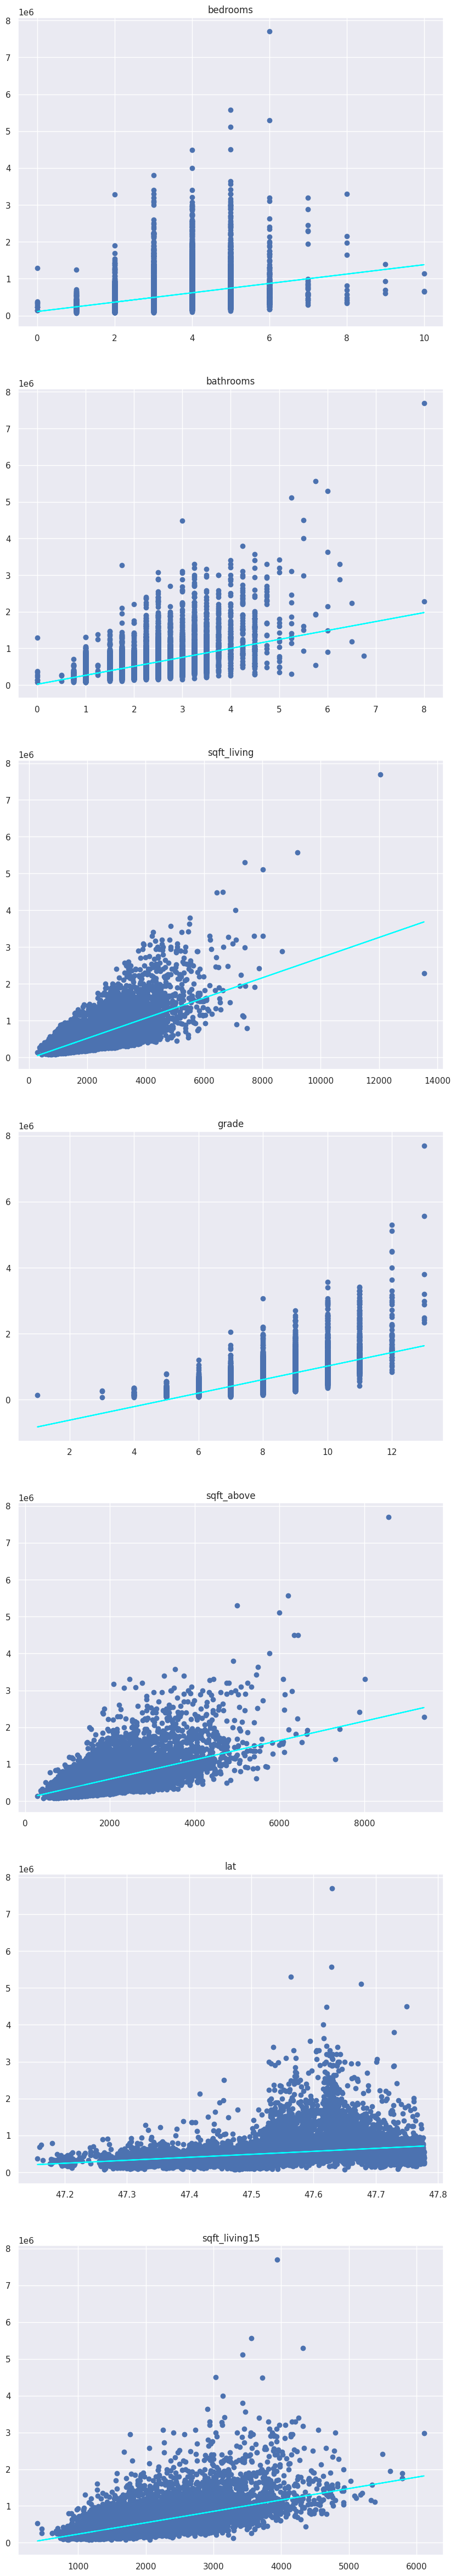

In [50]:
fig, axs = plt.subplots(7, figsize= (10,60))
axs[0].scatter(X_train_0, Y_train_0)
axs[0].plot(X_train_0, Y_pred_0, c= "cyan")
axs[0].set_title("bedrooms")

axs[1].scatter(X_train_1, Y_train_1)
axs[1].plot(X_train_1, Y_pred_1, c= "cyan")
axs[1].set_title("bathrooms")

axs[2].scatter(X_train_2, Y_train_2)
axs[2].plot(X_train_2, Y_pred_2, c= "cyan")
axs[2].set_title("sqft_living")

axs[3].scatter(X_train_3, Y_train_3)
axs[3].plot(X_train_3, Y_pred_3, c= "cyan")
axs[3].set_title("grade")

axs[4].scatter(X_train_4, Y_train_4)
axs[4].plot(X_train_4, Y_pred_4, c= "cyan")
axs[4].set_title("sqft_above")

axs[5].scatter(X_train_5, Y_train_5)
axs[5].plot(X_train_5, Y_pred_5, c= "cyan")
axs[5].set_title("lat")

axs[6].scatter(X_train_6, Y_train_6)
axs[6].plot(X_train_6, Y_pred_6, c= "cyan")
axs[6].set_title("sqft_living15")

In [51]:
print(lin_reg_0.score(X_test_0[:, None], Y_test_0))
print(lin_reg_1.score(X_test_1[:, None], Y_test_1))
print(lin_reg_2.score(X_test_2[:, None], Y_test_2))
print(lin_reg_3.score(X_test_3[:, None], Y_test_3))
print(lin_reg_4.score(X_test_4[:, None], Y_test_4))
print(lin_reg_5.score(X_test_5[:, None], Y_test_5))
print(lin_reg_6.score(X_test_6[:, None], Y_test_6))

0.068253247320336
0.27829000898342227
0.5143440006377646
0.4370846480850209
0.384110636916956
0.08646840710315284
0.3360510999600089


In [52]:
#multi linear reg
multi_reg = LinearRegression().fit(X_train, Y_train)
multi_reg.score(X_test, Y_test)

0.6046979656467932

In [53]:
poly = PolynomialFeatures(degree=3)
x_= poly.fit_transform(X_train)
poly_reg = LinearRegression().fit(x_, Y_train)
poly_reg.score(poly.fit_transform(X_test), Y_test)

0.6979234383045037

After computing the accuracy (score) of our models we can safely say that the polynomial regression model performed the best(0.7), not too far from the multi-linear one tho (0.6) as there's only a 0.1 difference betwene the two.
The simple linear models didn't do tha well on the other hand, one of them did manage to get a 0.51 score. this means that the more features we have, the better our model will perform. And by using the polynomial regression model, we can really deepen the connection between features and thus track patterns in our data more accurately.